In Logistic Regression, the model doesn't just predict "Yes" or "No"; it calculates a **probability** (e.g., "There is a 72% chance this is Spam"). By default, scikit-learn uses a **0.5 threshold** to decide the class.

The ROC curve and AUC score help you look "under the hood" to see how well the model separates classes regardless of that 0.5 default.

---

## 1. The ROC Curve (Receiver Operating Characteristic)

The ROC curve is a plot that shows the performance of your model at **all possible thresholds** (from 0.0 to 1.0).

It plots two metrics against each other:

* **Y-Axis: True Positive Rate (TPR / Sensitivity / Recall):** Of all actual positives, how many did we correctly catch?

* **X-Axis: False Positive Rate (FPR):** Of all actual negatives, how many did we wrongly flag as positive?


**How to read it:** * **The Diagonal Line:** Represents a "random guesser." If your curve is on this line, your model is essentially flipping a coin.

* **The Top-Left Corner:** The "Perfect Model" point. It means you caught 100% of positives (TPR=1) with 0% false alarms (FPR=0). The closer your curve "hugs" this corner, the better.

---

## 2. The ROC AUC Score (Area Under the Curve)

While the ROC is a graph, the **AUC** is a single number that summarizes that graph. It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one.

* **1.0:** Perfect model.
* **0.5:** No better than random guessing.
* **0.0:** Perfectly wrong (it's predicting the opposite of the truth).

---

## 3. Selecting the Optimal Threshold

You can use the data from the ROC curve to find a threshold that is better for your specific problem than the default **0.5**.

### Method A: The Youden Index (Geometric Best)

If you want to balance Sensitivity and Specificity equally, you look for the point on the curve furthest from the diagonal line.
**Formula:** 
You calculate  for every threshold and pick the one where  is maximized.

### Method B: Business/Domain Selection (Practical Best)

Often, the "best" threshold depends on the **cost of being wrong**:

* **Cancer Detection:** Missing a case (False Negative) is deadly. You would lower the threshold (e.g., to 0.2) to catch every possible case, even if it means more False Positives.
* **Spam Filters:** Flagging an important work email as spam (False Positive) is very annoying. You would raise the threshold (e.g., to 0.9) to be absolutely sure before blocking an email.

---

In [19]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt 

In [20]:
# Generate 2 class Dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [21]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [22]:
# Let's create a dummy model that will give the output for any data as 0
# Why ? : We need to model to compare against our Real Logistic model
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
# Let's create our basic Logistic Model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
# Calculate the probability of the  logistic model (prediction based on probability)
model_prob = model.predict_proba(X_test)

In [25]:
# And now let's just focus on positive outcome (1's)
model_prob = model_prob[:,1]

In [ ]:
# Calculate the roc_auc score
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)  # 0.5 because all values are exactly zero
print(model_auc)    #

0.5
0.9232456140350878


##### False Positive Rate:

---

**Formula**

        $FP/N = FP/FP + TN$

**FP**: Number of False Positives

**TN**: Number of True Negetives

**N**: Total number of Negetives

---

##### Sensitivity, Recall, Hit Rate or True Positive Rate:

        $(TPR = TP/P = TP/TP+FN = 1 - FNR)$


*Now when we plot `FPR` on X-axis ans and 'TPR` on Y-axis we get roc curve*

In [28]:
# To calculate the ROC Curve we have roc_curve in sklearn so we don;t manually use the formulation manually the model does it for us.
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, _ = roc_curve(y_test, model_prob)

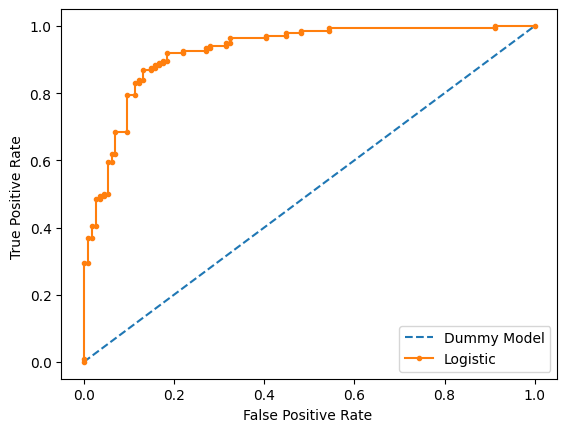

In [29]:
# Now we can just plot FPR on X-axis and TPR on Y-axis to get the ROC Curve

plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label="Dummy Model")
plt.plot(model_fpr, model_tpr, marker=".", label="Logistic")

plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')

plt.legend()
plt.show()

To find the optimal threshold from your ROC curve, we are essentially looking for the specific "dot" on that orange line in our graph that provides the best balance of True Positives and False Positives for our specific use case.

1. Lets go to the `roc_curve` function as it returns 3 values `tpr`, fpr` and `threshold`:

In [30]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [31]:
thresholds

array([           inf, 9.99553764e-01, 9.39496987e-01, 9.36732025e-01,
       9.13252414e-01, 9.09991853e-01, 8.95270782e-01, 8.95036262e-01,
       8.69913569e-01, 8.66043844e-01, 8.57581727e-01, 8.48810315e-01,
       8.45140783e-01, 8.42623874e-01, 8.03371057e-01, 8.01282475e-01,
       7.89459343e-01, 7.76579862e-01, 7.28221281e-01, 7.13478526e-01,
       6.01507440e-01, 5.82911698e-01, 5.14429540e-01, 5.04637901e-01,
       5.03669367e-01, 5.03073298e-01, 4.69001994e-01, 4.63040656e-01,
       4.56979367e-01, 4.55023943e-01, 4.50531614e-01, 4.36245243e-01,
       4.35056210e-01, 4.19808622e-01, 4.14620476e-01, 4.10995319e-01,
       3.90139627e-01, 3.66392184e-01, 3.62088932e-01, 2.97027861e-01,
       2.81723864e-01, 2.71874667e-01, 2.58848472e-01, 2.32154964e-01,
       2.31693719e-01, 2.30369604e-01, 2.03918182e-01, 1.38454674e-01,
       1.35189789e-01, 1.29272162e-01, 1.28501963e-01, 1.18052536e-01,
       1.16130995e-01, 8.98411999e-02, 8.75397210e-02, 9.23284478e-03,
      

The best value for the threshold is essentially where the TPR is high and FPR is low. We are looking for a "sweet spot" on that orange curve where we have maximized our gains (True Positives) while minimizing our costs (False Positives)

Here is how you finalize the selection process:

---

##### 1. Visual Selection: Finding the "Elbow"

On the ROC plot you provided, the threshold you want is typically located at the **"elbow"**—the point where the curve bends most sharply toward the top-left corner.

* **Before the elbow:** You are gaining a lot of True Positives for very little increase in False Positives.
* **After the elbow:** You start gaining very few extra True Positives, but your False Positives begin to skyrocket.

---


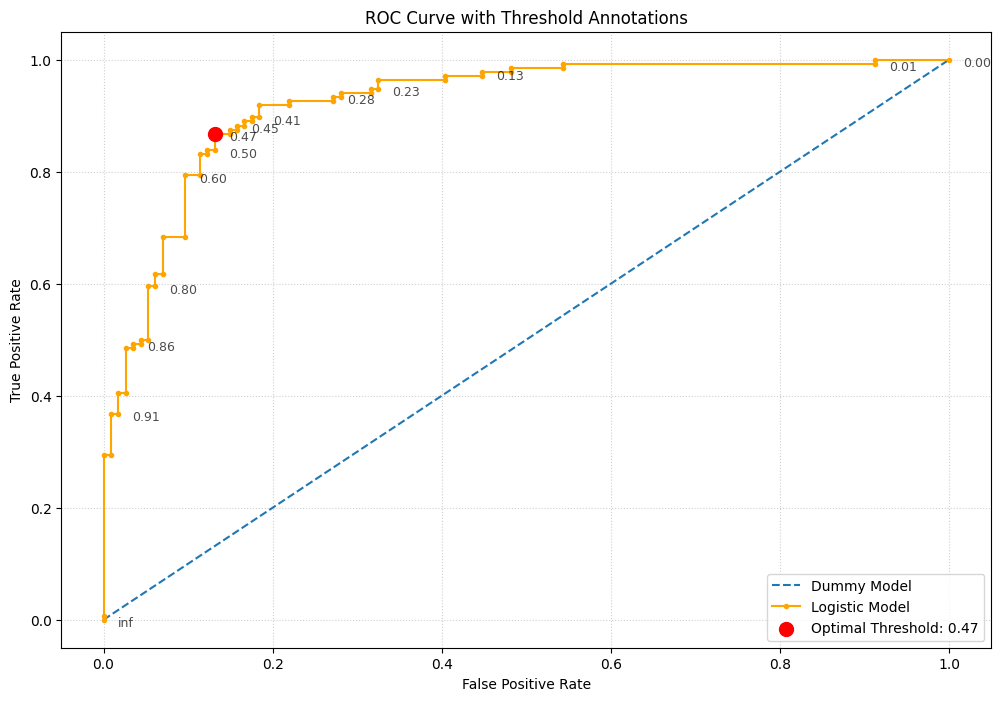

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted figure size for better visibility
fig, ax = plt.subplots(figsize=(12, 8)) 

# 1. Plot the models directly on the 'ax' object
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label="Dummy Model")
ax.plot(model_fpr, model_tpr, marker=".", label="Logistic Model", color='orange')

# 2. Find the "Best" threshold mathematically (Youden's J-statistic)
# This helps you identify which annotation to focus on
best_idx = np.argmax(model_tpr - model_fpr)
best_threshold = thresholds[best_idx]

# 3. Annotate thresholds
# We iterate using index 'i' to filter how many labels we show
for i, thresh in enumerate(thresholds):
    # Only show every 5th label to avoid a "blob" of text, 
    # but ALWAYS show the first, last, and the "best" one.
    if i % 5 == 0 or i == best_idx or i == len(thresholds)-1:
        ax.annotate(f'{thresh:.2f}', 
                    xy=(model_fpr[i], model_tpr[i]),
                    textcoords="offset points", 
                    xytext=(10,-5), 
                    fontsize=9,
                    alpha=0.7)

# 4. Highlight the "Optimal" point in Red
ax.scatter(model_fpr[best_idx], model_tpr[best_idx], color='red', s=100, 
           label=f'Optimal Threshold: {best_threshold:.2f}', zorder=5)

# Labels and Legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve with Threshold Annotations')

# Now the legend will find the labels because they were attached to 'ax'
ax.legend(loc='lower right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [46]:
# model_fpr, model_tpr, and thresholds from roc_curve()
import numpy as np

# Step 1 & 2: Calculate the difference and find the index of the max
best_index = np.argmax(model_tpr - model_fpr)

# Step 3: Get the actual probability value
final_threshold = thresholds[best_index]

print(f"The mathematically 'best' threshold is: {final_threshold}")

The mathematically 'best' threshold is: 0.4690019938482247
